In [1]:
import sys
sys.path.append('..')


In [2]:
%matplotlib inline

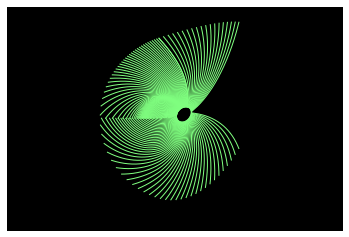

In [33]:
# stuff.py
#
# Script that demonstrates how to run functions in oyster.py  
#
import importlib
# importlib.reload(oyster)

import oyster
import numpy as np
import matplotlib.pyplot as plt
import utils

#to refresh changes:
#import importlib
#importlib.reload(oyster)

#  Non-default Jasonius model parameters
nCells = 500      #  Total number of ganglion cells (8800)
nR = 801          #  Number of steps for each ganglion cell

# Default model parameters:
#center = [15,2]   #  p.center of optic disc
#rot = 0*np.pi/180 #  angle of rotation (clockwise)
#scale = 1         #  scale factor
#bs = -1.9         #  superior 'b' parameter constant
#bi = .5           #  inferior 'c' parameter constant
#angRange = 60     # range of angles +/- from horizontal
#maxR = 45         # max eccentricity (deg visual angle)
#r0 = 4            #  minumum radius (optic disc size)

axon_lambda = 2     # space constant for axonal streaks
                    # we think it's somewhere between 1 and 3.4 degrees

x, y = oyster.jansonius(150,nR)  


# plot an image of the axon maps
fig, ax = plt.subplots(1)
ax.set_axis_bgcolor('black')
ax.plot(x, y, c=(0.5, 1, 0.5))
ax.set_aspect('equal', 'datalim')
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('jansonius.png')


In [19]:
nCells

500

In [ ]:
# generate xg,yg - the grid of pixel locations for the current map
xlo = -4
xhi = 4
ylo = -4
yhi = 4
n = (101,101)
xg,yg =  np.meshgrid(np.linspace(xlo,xhi,n[0]),np.linspace(ylo,yhi,n[1]))

# make the mapping that contains the indices and weights from mapping 
# from current maps to effective current maps.  This only needs to be run once.
# the output should be saved and loaded in when needed.

axon_map = oyster.makeAxonMap(xg,yg,axon, axon_lambda)

# made-up current map

cm = np.exp(-((xg-1)**2+(yg+3)**2)/1)
cm[60:65,20:25]= 1

cm[50:60,80:90]= 1
cm = cm + np.exp(-((xg-2)**2+(yg-3)**2)/1)

# show the currrent map as an image
plt.subplot(1,2,1)
plt.imshow(cm,extent = (xlo,xhi,ylo,yhi),cmap = 'viridis')

# pass the current map through the axon map
ecm = oyster.cm2ecm(cm,axon_map)

# show the effective current map as an image
plt.subplot(1,2,2)
plt.imshow(ecm,extent = (xlo,xhi,ylo,yhi),cmap = 'viridis')